In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ushealthinsurancedataset/insurance.csv


In [2]:
data=pd.read_csv("/kaggle/input/ushealthinsurancedataset/insurance.csv")

In [3]:
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.shape

(1338, 7)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

**impact of age on helth insurance charges**

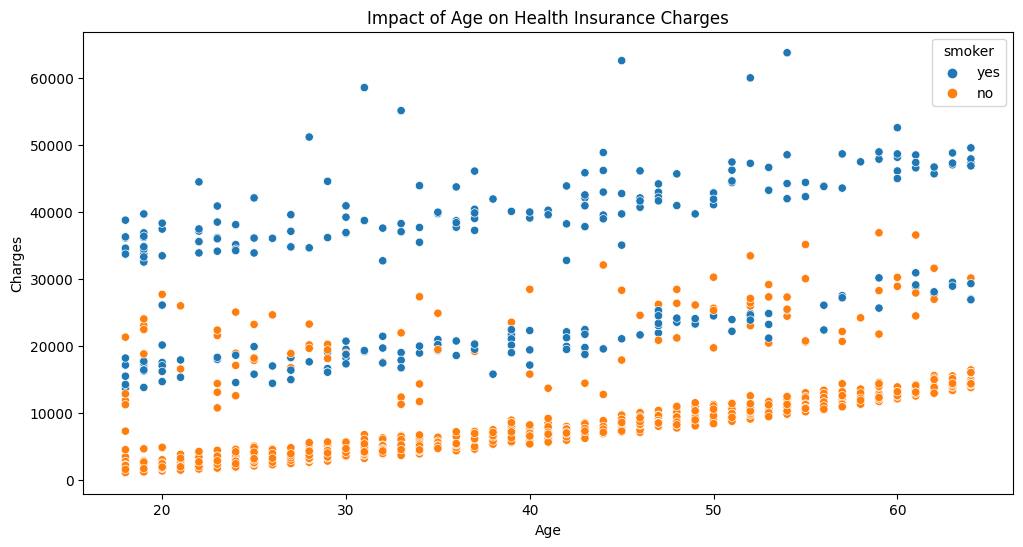

In [7]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='charges', data=data, hue='smoker')
plt.title('Impact of Age on Health Insurance Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


**distribution of BMI among smokers and non-smokers**

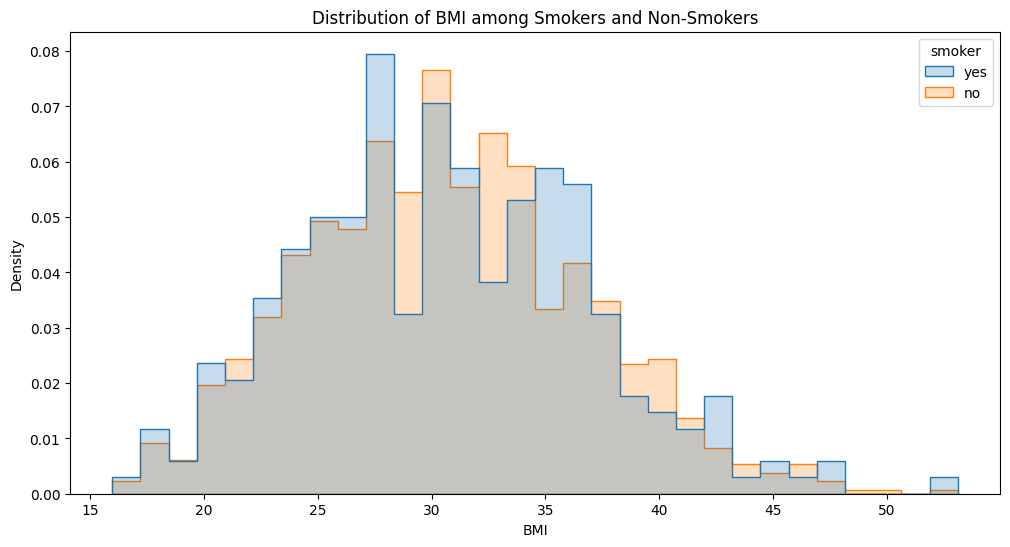

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(x='bmi', data=data, hue='smoker', element='step', stat='density', common_norm=False, bins=30)
plt.title('Distribution of BMI among Smokers and Non-Smokers')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()

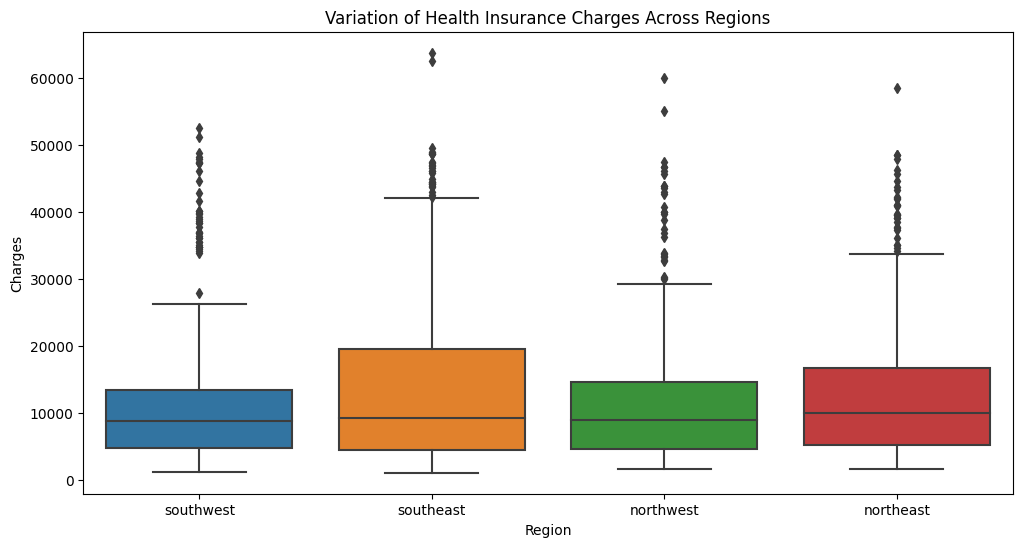

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='charges', data=data)
plt.title('Variation of Health Insurance Charges Across Regions')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

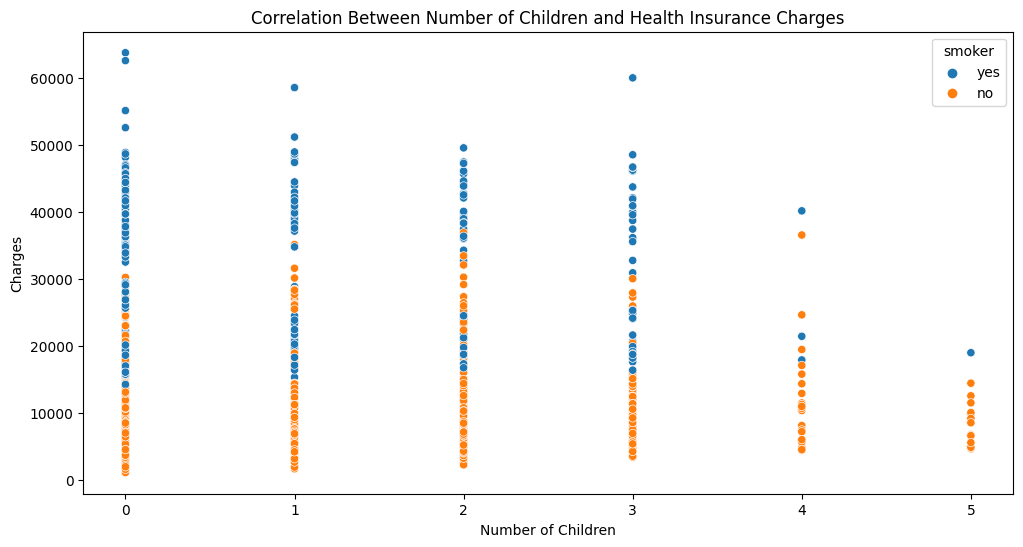

In [10]:
# Visualization
plt.figure(figsize=(12, 6))
sns.scatterplot(x='children', y='charges', data=data, hue='smoker')
plt.title('Correlation Between Number of Children and Health Insurance Charges')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()

**relationship between BMI and charges, considering the smoking status**

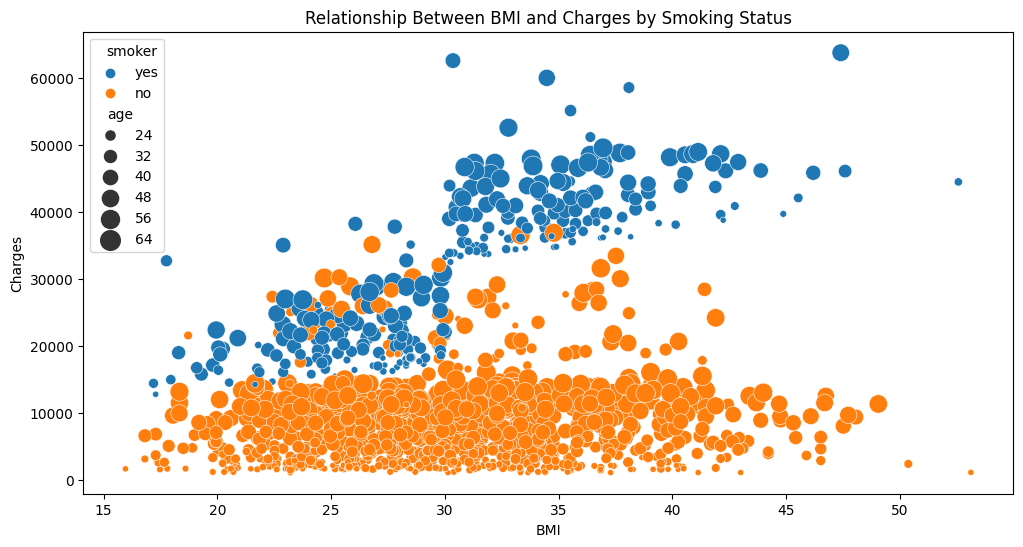

In [11]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='bmi', y='charges', data=data, hue='smoker', size='age', sizes=(20, 200))
plt.title('Relationship Between BMI and Charges by Smoking Status')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

In [12]:
# Function to create a more visually appealing pie chart
def enhanced_pie_plot(column):
    colors = sns.color_palette('pastel')[0:len(data[column].value_counts())]
    fig, ax = plt.subplots()
    ax.pie(data[column].value_counts(), autopct="%0.2f%%", labels=data[column].value_counts().index,
           startangle=90, wedgeprops=dict(width=0.4), colors=colors)
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    ax.add_patch(centre_circle)
    ax.set(title=f"Donut Chart of {column}")
    ax.axis('equal')



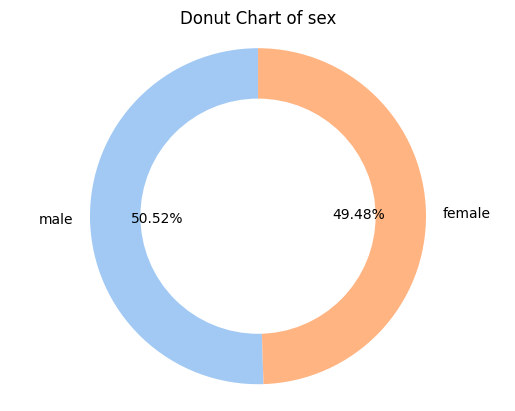

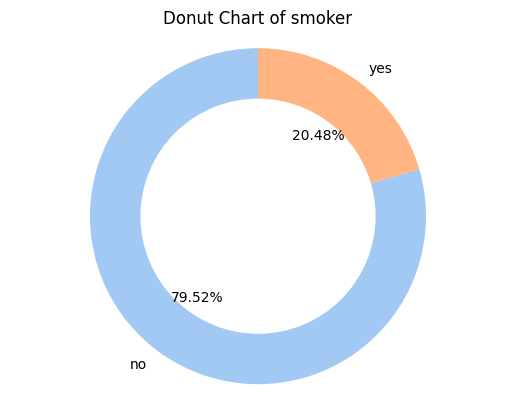

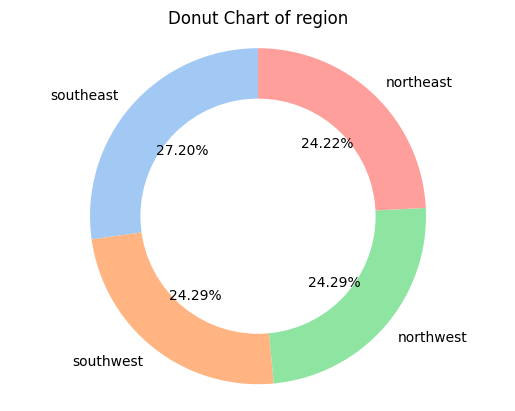

In [13]:
columns = ["sex", "smoker", "region"]
for i in columns:
    enhanced_pie_plot(i)
plt.show()


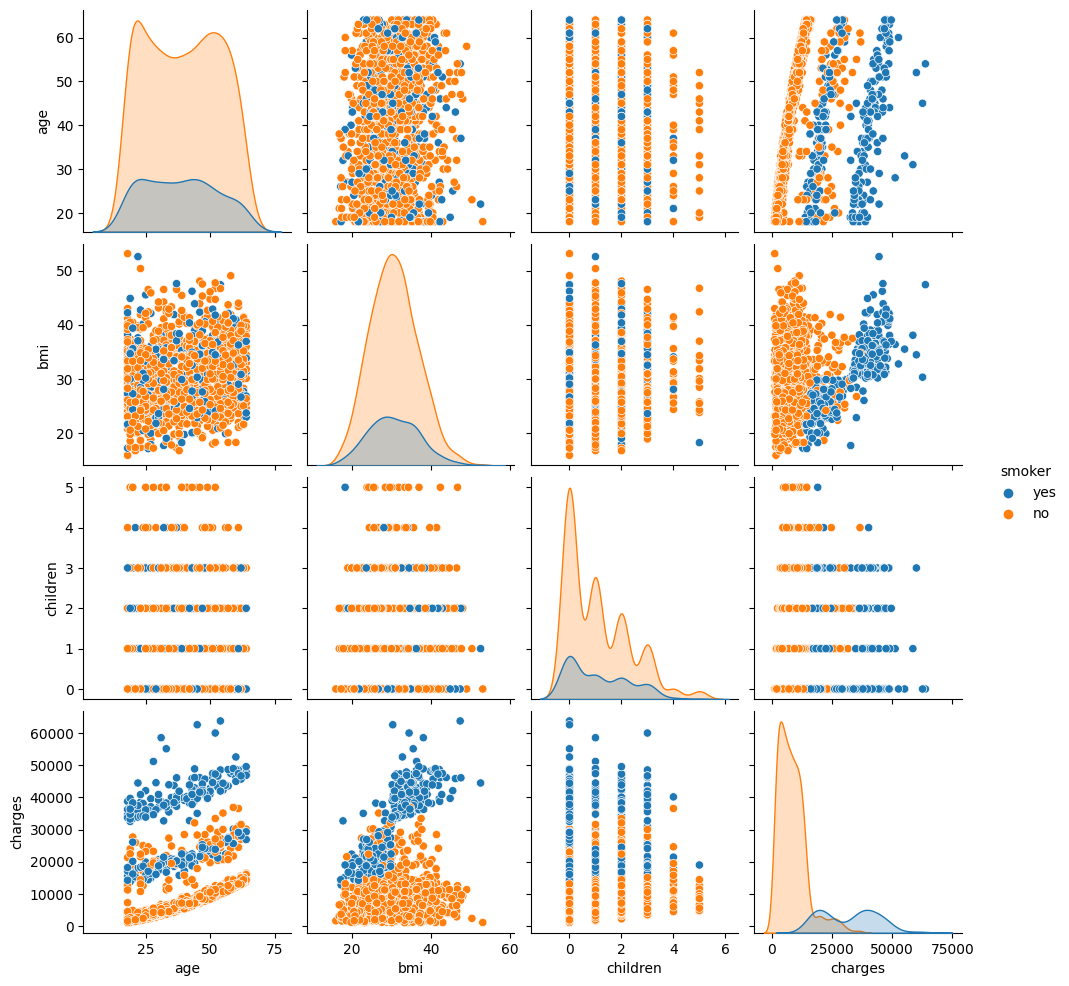

In [14]:
sns.pairplot(data,hue="smoker")

In [15]:
data['sex'] = data['sex'].apply({'male':0,'female':1}.get) 
data['smoker'] = data['smoker'].apply({'yes':1, 'no':0}.get)
data['region'] = data['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

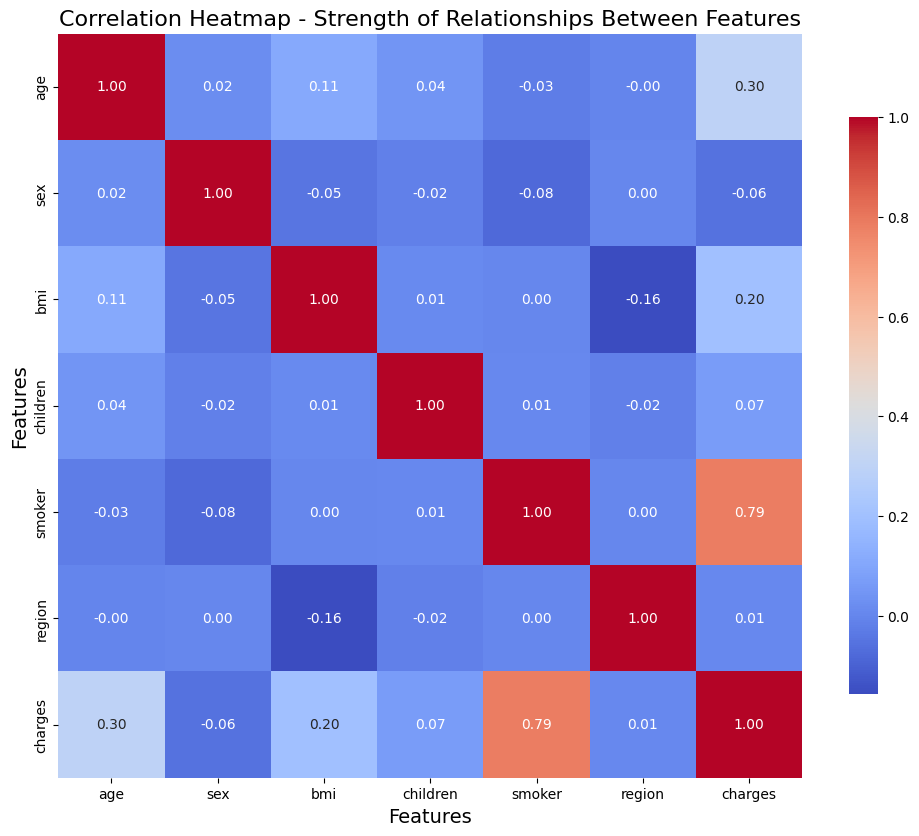

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": 0.75})
plt.title('Correlation Heatmap - Strength of Relationships Between Features', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Display the plot
plt.show()

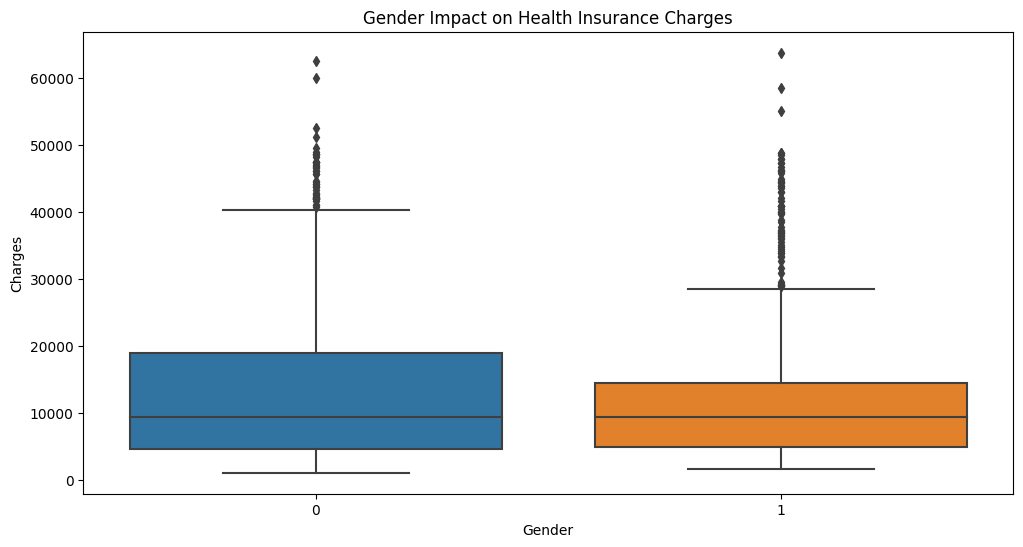

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='sex', y='charges', data=data)
plt.title('Gender Impact on Health Insurance Charges')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.show()


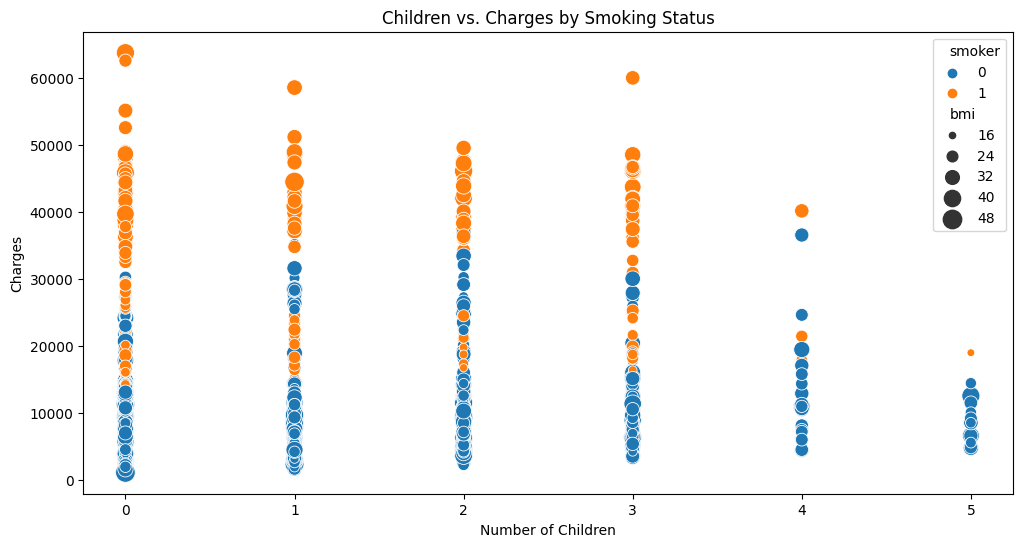

In [18]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='children', y='charges', data=data, hue='smoker', size='bmi', sizes=(20, 200))
plt.title('Children vs. Charges by Smoking Status')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()


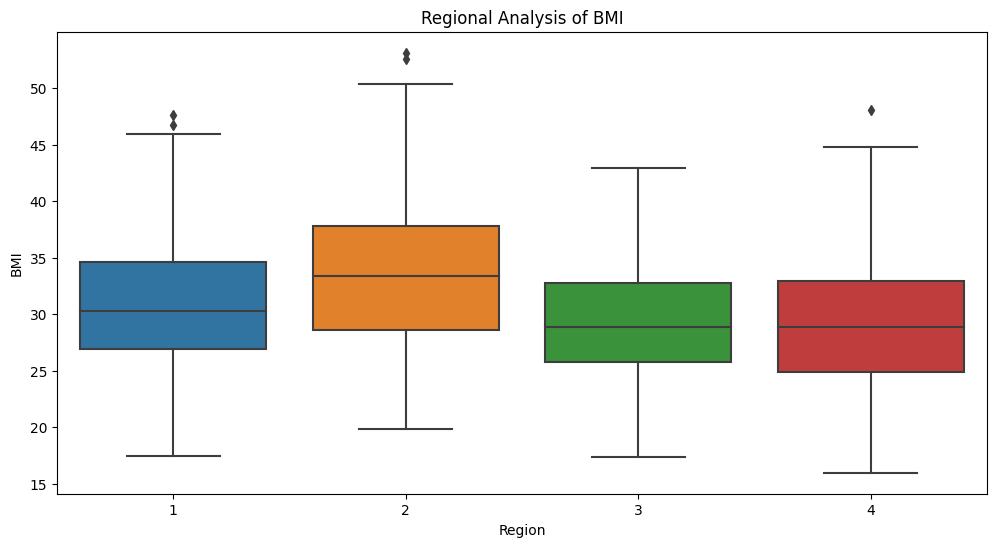

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='bmi', data=data)
plt.title('Regional Analysis of BMI')
plt.xlabel('Region')
plt.ylabel('BMI')
plt.show()


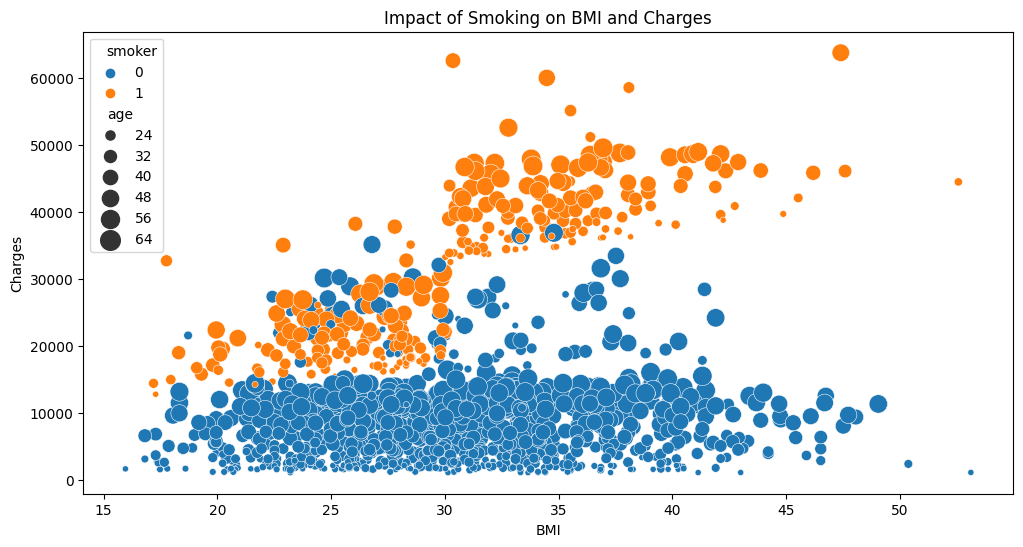

In [20]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='bmi', y='charges', data=data, hue='smoker', size='age', sizes=(20, 200))
plt.title('Impact of Smoking on BMI and Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()



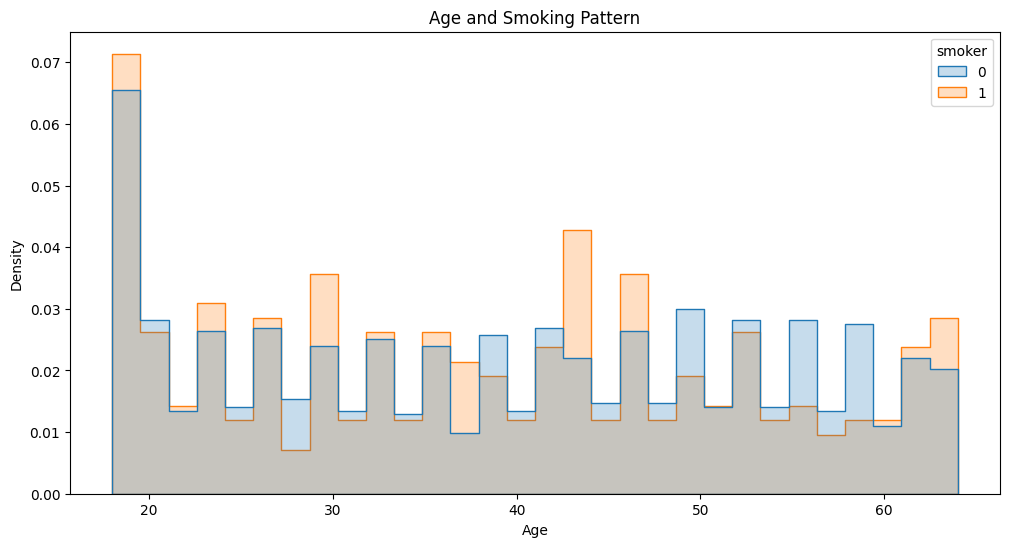

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(x='age', data=data, hue='smoker', element='step', stat='density', common_norm=False, bins=30)
plt.title('Age and Smoking Pattern')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()



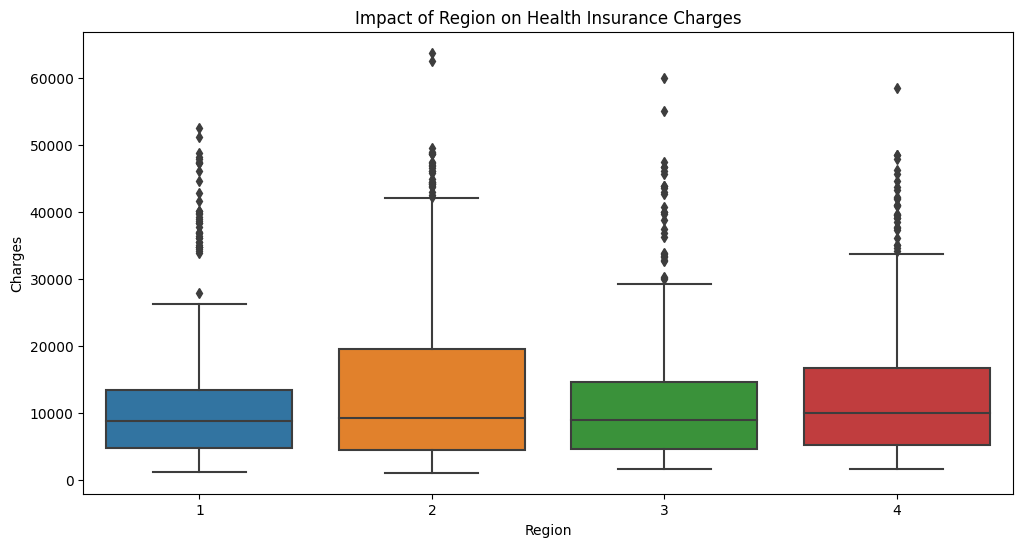

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='charges', data=data)
plt.title('Impact of Region on Health Insurance Charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [37]:
X = data[['age','bmi', 'smoker']]
y = data[['charges']]

In [38]:
# Assume 'X' contains features and 'y' is the target variable (charges)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [40]:
predictions = model.predict(X_test)

In [41]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 27450164.922955927


In [42]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [44]:
import numpy as np
testing = np.array([24,20.1,0]).reshape(1,3)
print(model.predict(testing)[0])

7116.6597
